In [400]:
import pandas as pd
import pmdarima as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn import metrics
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import folium
from sklearn import preprocessing
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
import statsmodels.api as sm
from sklearn import metrics
%matplotlib inline

In [401]:
#Transforming the data to be time series interperatible
con = pd.read_csv('time_series_covid19_confirmed_US.csv')
pro =pd.read_csv('time_series_covid19_deaths_US.csv')
US_confirmed = pd.melt(con, id_vars=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key'])
US_confirmed['variable'] = pd.to_datetime(US_confirmed['variable'], infer_datetime_format=True)
cases_confirmed = pd.melt(con, id_vars=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key'])
cases_confirmed['variable'] = pd.to_datetime(US_confirmed['variable'], infer_datetime_format=True)
US_deaths = pd.melt(pro, id_vars=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key','Population'])
US_deaths['variable'] = pd.to_datetime(US_deaths['variable'], infer_datetime_format=True)
cases_deaths = pd.melt(pro, id_vars=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key','Population'])
cases_deaths['variable'] = pd.to_datetime(US_deaths['variable'], infer_datetime_format=True)
US_confirmed['variable'] = pd.to_datetime(US_confirmed['variable'], format='%y-%m-%d')
US_deaths['variable'] = pd.to_datetime(US_deaths['variable'], format='%y-%m-%d')

In [402]:
#Creating a dataframe with only values we need and reseting the index to a daily bases
def setting_index(x):
    x.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'],inplace=True,axis=1)
    x.set_index(['variable'],inplace=True)
    return pd.DataFrame(x.resample('D').sum())
def sett_index(x):
    x.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key'],inplace=True,axis=1)
    x.set_index(['variable'],inplace=True)
    return pd.DataFrame(x.resample('D').sum())

## National confirmed cases dataset

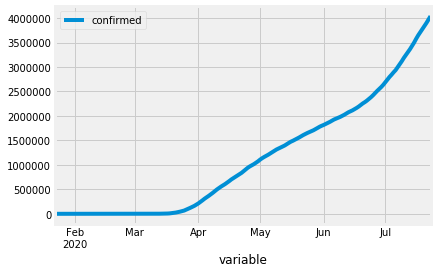

In [403]:
#aggregating to a national leve1
national_confirmed =sett_index(cases_confirmed)
national_confirmed.rename(columns={'value':'confirmed'}, inplace=True)
national_confirmed.plot()

## Confirmed cases

In [404]:
#Applying sett_index to every individual state
American_Samoa=sett_index(US_confirmed[US_confirmed['Province_State']=='American Samoa'])
Guam=sett_index(US_confirmed[US_confirmed['Province_State']=='Guam'])
Northern_Mariana_Islands=sett_index(US_confirmed[US_confirmed['Province_State']=='Northern Mariana Islands'])
Puerto_Rico=sett_index(US_confirmed[US_confirmed['Province_State']=='Puerto Rico'])
Virgin_Islands=sett_index(US_confirmed[US_confirmed['Province_State']=='Virgin Islands'])
Alabama=sett_index(US_confirmed[US_confirmed['Province_State']=='Alabama'])
Alaska=sett_index(US_confirmed[US_confirmed['Province_State']=='Alaska'])
Arizona=sett_index(US_confirmed[US_confirmed['Province_State']=='Arizona'])
Arkansas=sett_index(US_confirmed[US_confirmed['Province_State']=='Arkansas'])
California=sett_index(US_confirmed[US_confirmed['Province_State']=='California'])
Colorado=sett_index(US_confirmed[US_confirmed['Province_State']=='Colorado'])
Connecticut=sett_index(US_confirmed[US_confirmed['Province_State']=='Connecticut'])
Delaware=sett_index(US_confirmed[US_confirmed['Province_State']=='Delaware'])
District_of_Columbia=sett_index(US_confirmed[US_confirmed['Province_State']=='District of Columbia'])
Florida=sett_index(US_confirmed[US_confirmed['Province_State']=='Florida'])
Georgia=sett_index(US_confirmed[US_confirmed['Province_State']=='Georgia'])
Hawaii=sett_index(US_confirmed[US_confirmed['Province_State']=='Hawaii'])
Idaho=sett_index(US_confirmed[US_confirmed['Province_State']=='Idaho'])
Illinois=sett_index(US_confirmed[US_confirmed['Province_State']=='Illinois'])
Indiana=sett_index(US_confirmed[US_confirmed['Province_State']=='Indiana'])
Iowa=sett_index(US_confirmed[US_confirmed['Province_State']=='Iowa'])
Kansas=sett_index(US_confirmed[US_confirmed['Province_State']=='Kansas'])
Kentucky=sett_index(US_confirmed[US_confirmed['Province_State']=='Kentucky'])
Louisiana=sett_index(US_confirmed[US_confirmed['Province_State']=='Louisiana'])
Maine=sett_index(US_confirmed[US_confirmed['Province_State']=='Maine'])
Maryland=sett_index(US_confirmed[US_confirmed['Province_State']=='Maryland'])
Massachusetts=sett_index(US_confirmed[US_confirmed['Province_State']=='Massachusetts'])
Michigan=sett_index(US_confirmed[US_confirmed['Province_State']=='Michigan'])
Minnesota=sett_index(US_confirmed[US_confirmed['Province_State']=='Minnesota'])
Mississippi=sett_index(US_confirmed[US_confirmed['Province_State']=='Mississippi'])
Missouri=sett_index(US_confirmed[US_confirmed['Province_State']=='Missouri'])
Montana=sett_index(US_confirmed[US_confirmed['Province_State']=='Montana'])
Nebraska=sett_index(US_confirmed[US_confirmed['Province_State']=='Nebraska'])
Nevada=sett_index(US_confirmed[US_confirmed['Province_State']=='Nevada'])
New_Hampshire=sett_index(US_confirmed[US_confirmed['Province_State']=='New Hampshire'])
New_Jersey=sett_index(US_confirmed[US_confirmed['Province_State']=='New Jersey'])
New_Mexico=sett_index(US_confirmed[US_confirmed['Province_State']=='New Mexico'])
New_York=sett_index(US_confirmed[US_confirmed['Province_State']=='New York'])
North_Carolina=sett_index(US_confirmed[US_confirmed['Province_State']=='North Carolina'])
North_Dakota=sett_index(US_confirmed[US_confirmed['Province_State']=='North Dakota'])
Ohio=sett_index(US_confirmed[US_confirmed['Province_State']=='Ohio'])
Oklahoma=sett_index(US_confirmed[US_confirmed['Province_State']=='Oklahoma'])
Oregon=sett_index(US_confirmed[US_confirmed['Province_State']=='Oregon'])
Pennsylvania=sett_index(US_confirmed[US_confirmed['Province_State']=='Pennsylvania'])
Rhode_Island=sett_index(US_confirmed[US_confirmed['Province_State']=='Rhode Island'])
South_Carolina=sett_index(US_confirmed[US_confirmed['Province_State']=='South Carolina'])
South_Dakota=sett_index(US_confirmed[US_confirmed['Province_State']=='South Dakota'])
Tennessee=sett_index(US_confirmed[US_confirmed['Province_State']=='Tennessee'])
Texas=sett_index(US_confirmed[US_confirmed['Province_State']=='Texas'])
Utah=sett_index(US_confirmed[US_confirmed['Province_State']=='Utah'])
Vermont=sett_index(US_confirmed[US_confirmed['Province_State']=='Vermont'])
Virginia=sett_index(US_confirmed[US_confirmed['Province_State']=='Virginia'])
Washington=sett_index(US_confirmed[US_confirmed['Province_State']=='Washington'])
West_Virginia=sett_index(US_confirmed[US_confirmed['Province_State']=='West Virginia'])
Wisconsin=sett_index(US_confirmed[US_confirmed['Province_State']=='Wisconsin'])
Wyoming=sett_index(US_confirmed[US_confirmed['Province_State']=='Wyoming'])
Diamond_Princess=sett_index(US_confirmed[US_confirmed['Province_State']=='Diamond Princess'])
Grand_Princess=sett_index(US_confirmed[US_confirmed['Province_State']=='Grand Princess'])

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [405]:
#cleaning state data
US_deaths_states = [American_Samoa, Guam, Northern_Mariana_Islands,Puerto_Rico, Virgin_Islands, Alabama, Alaska, Arizona,Arkansas, California, Colorado, Connecticut, Delaware,District_of_Columbia, Florida, Georgia, Hawaii, Idaho,Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana,Maine, Maryland, Massachusetts, Michigan, Minnesota,Mississippi, Missouri, Montana, Nebraska, Nevada,New_Hampshire, New_Jersey, New_Mexico, New_York,North_Carolina, North_Dakota, Ohio, Oklahoma, Oregon,Pennsylvania, Rhode_Island, South_Carolina, South_Dakota,Tennessee, Texas, Utah, Vermont, Virginia, Washington,West_Virginia, Wisconsin, Wyoming, Diamond_Princess,Grand_Princess]

In [406]:
US_deaths_states_string = ['American_Samoa', 'Guam', 'Northern_Mariana_Islands','Puerto_Rico', 'Virgin_Islands', 'Alabama', 'Alaska', 'Arizona','Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware','District_of_Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho','Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana','Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota','Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada','New_Hampshire', 'New_Jersey', 'New_Mexico', 'New_York','North_Carolina', 'North_Dakota', 'Ohio', 'Oklahoma', 'Oregon','Pennsylvania', 'Rhode_Island', 'South_Carolina', 'South_Dakota','Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington','West_Virginia', 'Wisconsin', 'Wyoming', 'Diamond_Princess','Grand_Princess']

In [407]:
American_Samoa.rename(columns={'value':US_deaths_states_string[0]},inplace=True)
Guam.rename(columns={'value':US_deaths_states_string[1]},inplace=True)
Northern_Mariana_Islands.rename(columns={'value':US_deaths_states_string[2]},inplace=True)
Puerto_Rico.rename(columns={'value':US_deaths_states_string[3]},inplace=True)
Virgin_Islands.rename(columns={'value':US_deaths_states_string[4]},inplace=True)
Alabama.rename(columns={'value':US_deaths_states_string[5]},inplace=True)
Alaska.rename(columns={'value':US_deaths_states_string[6]},inplace=True)
Arizona.rename(columns={'value':US_deaths_states_string[7]},inplace=True)
Arkansas.rename(columns={'value':US_deaths_states_string[8]},inplace=True)
California.rename(columns={'value':US_deaths_states_string[9]},inplace=True)
Colorado.rename(columns={'value':US_deaths_states_string[10]},inplace=True)
Connecticut.rename(columns={'value':US_deaths_states_string[11]},inplace=True)
Delaware.rename(columns={'value':US_deaths_states_string[12]},inplace=True)
District_of_Columbia.rename(columns={'value':US_deaths_states_string[13]},inplace=True)
Florida.rename(columns={'value':US_deaths_states_string[14]},inplace=True)
Georgia.rename(columns={'value':US_deaths_states_string[15]},inplace=True)
Hawaii.rename(columns={'value':US_deaths_states_string[16]},inplace=True)
Idaho.rename(columns={'value':US_deaths_states_string[17]},inplace=True)
Illinois.rename(columns={'value':US_deaths_states_string[18]},inplace=True)
Indiana.rename(columns={'value':US_deaths_states_string[19]},inplace=True)
Iowa.rename(columns={'value':US_deaths_states_string[20]},inplace=True)
Kansas.rename(columns={'value':US_deaths_states_string[21]},inplace=True)
Kentucky.rename(columns={'value':US_deaths_states_string[22]},inplace=True)
Louisiana.rename(columns={'value':US_deaths_states_string[23]},inplace=True)
Maine.rename(columns={'value':US_deaths_states_string[24]},inplace=True)
Maryland.rename(columns={'value':US_deaths_states_string[25]},inplace=True)
Massachusetts.rename(columns={'value':US_deaths_states_string[26]},inplace=True)
Michigan.rename(columns={'value':US_deaths_states_string[27]},inplace=True)
Minnesota.rename(columns={'value':US_deaths_states_string[28]},inplace=True)
Mississippi.rename(columns={'value':US_deaths_states_string[29]},inplace=True)
Missouri.rename(columns={'value':US_deaths_states_string[30]},inplace=True)
Montana.rename(columns={'value':US_deaths_states_string[31]},inplace=True)
Nebraska.rename(columns={'value':US_deaths_states_string[32]},inplace=True)
Nevada.rename(columns={'value':US_deaths_states_string[33]},inplace=True)
New_Hampshire.rename(columns={'value':US_deaths_states_string[34]},inplace=True)
New_Jersey.rename(columns={'value':US_deaths_states_string[35]},inplace=True)
New_Mexico.rename(columns={'value':US_deaths_states_string[36]},inplace=True)
New_York.rename(columns={'value':US_deaths_states_string[37]},inplace=True)
North_Carolina.rename(columns={'value':US_deaths_states_string[38]},inplace=True)
North_Dakota.rename(columns={'value':US_deaths_states_string[39]},inplace=True)
Ohio.rename(columns={'value':US_deaths_states_string[40]},inplace=True)
Oklahoma.rename(columns={'value':US_deaths_states_string[41]},inplace=True)
Oregon.rename(columns={'value':US_deaths_states_string[42]},inplace=True)
Pennsylvania.rename(columns={'value':US_deaths_states_string[43]},inplace=True)
Rhode_Island.rename(columns={'value':US_deaths_states_string[44]},inplace=True)
South_Carolina.rename(columns={'value':US_deaths_states_string[45]},inplace=True)
South_Dakota.rename(columns={'value':US_deaths_states_string[46]},inplace=True)
Tennessee.rename(columns={'value':US_deaths_states_string[47]},inplace=True)
Texas.rename(columns={'value':US_deaths_states_string[48]},inplace=True)
Utah.rename(columns={'value':US_deaths_states_string[49]},inplace=True)
Vermont.rename(columns={'value':US_deaths_states_string[50]},inplace=True)
Virginia.rename(columns={'value':US_deaths_states_string[51]},inplace=True)
Washington.rename(columns={'value':US_deaths_states_string[52]},inplace=True)
West_Virginia.rename(columns={'value':US_deaths_states_string[53]},inplace=True)
Wisconsin.rename(columns={'value':US_deaths_states_string[54]},inplace=True)
Wyoming.rename(columns={'value':US_deaths_states_string[55]},inplace=True)
Diamond_Princess.rename(columns={'value':US_deaths_states_string[56]},inplace=True)
Grand_Princess.rename(columns={'value':US_deaths_states_string[57]},inplace=True)

In [408]:
#Concat to show general distributions 
confirmed_concat = pd.concat([American_Samoa, Guam, Northern_Mariana_Islands,
       Puerto_Rico, Virgin_Islands, Alabama, Alaska, Arizona,
       Arkansas, California, Colorado, Connecticut, Delaware,
       District_of_Columbia, Florida, Georgia, Hawaii, Idaho,
       Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana,
       Maine, Maryland, Massachusetts, Michigan, Minnesota,
       Mississippi, Missouri, Montana, Nebraska, Nevada,
       New_Hampshire, New_Jersey, New_Mexico, New_York,
       North_Carolina, North_Dakota, Ohio, Oklahoma, Oregon,
       Pennsylvania, Rhode_Island, South_Carolina, South_Dakota,
       Tennessee, Texas, Utah, Vermont, Virginia, Washington,
       West_Virginia, Wisconsin, Wyoming, Diamond_Princess,
       Grand_Princess], axis=1)

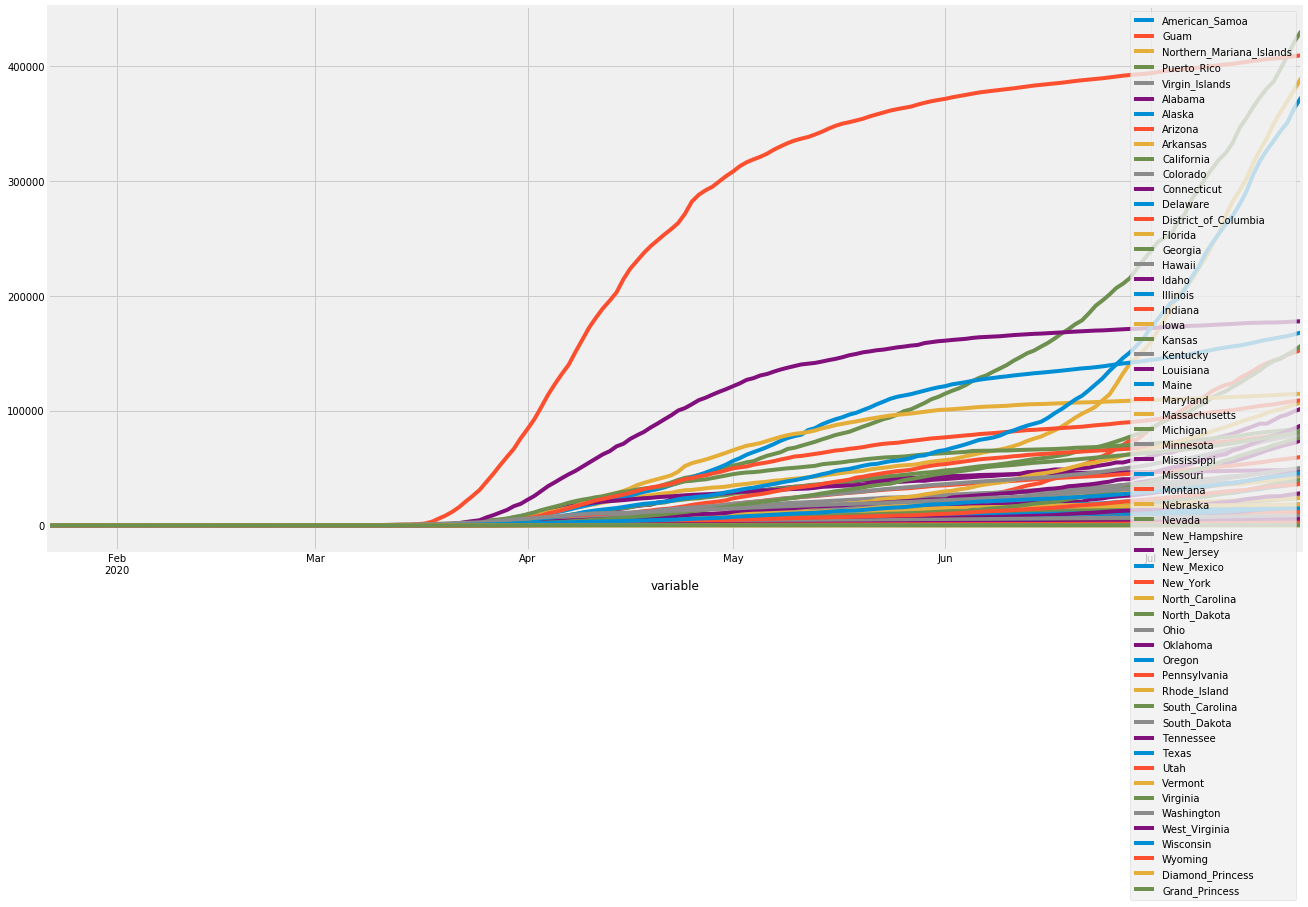

In [409]:
confirmed_concat.plot(figsize=(20,10))


In [410]:
#Map most confirmed regions
import folium
import json
data_temp = US_confirmed.groupby(["Province_State"]).sum().reset_index().drop(["Lat","Long_"],axis=1)
data_temp["Confirmed_log"] = np.log10(data_temp["value"]+1)
bins = list(data_temp['Confirmed_log'].quantile([0, 0.25, 0.5, 0.75,0.95 ,1]))
m = folium.Map(location=[37, -102], zoom_start=4,max_zoom=6,min_zoom=3)
f = open('state_geo.json',)
state_geo = json.load(f)
folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data = data_temp,
    columns=['Province_State', 'Confirmed_log'],
    key_on='feature.properties.name',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.2,
    bins = bins,
    reset=True,
    legend_name='Confirmed cases log (10^x)'
).add_to(m)
folium.LayerControl().add_to(m)

legend_html = "<div style='padding:10px;background-color:rgba(255,255,255,0.5);position:fixed;bottom:20px;left:20px;z-index:1000'>"
legend_html += "<div style='width:100%;text-align:center;'><h4>Index for Legend</h4></div><hr style='border-top-color: rgba(25,25,25,0.5);'>"
legend_html += "<ul style='margin:0;padding:0;color: #555;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"
for i in bins:
    legend_html += "<li style='margin:0;padding:0;line-height: 0;'>Value "+str(np.round(i,2))+" : "+str(int(10**i)-1)+"</li><br>"
legend_html += "</ul></div>"
m.get_root().html.add_child(folium.Element(legend_html))
m

##  Testing Confirmed Total Arima

In [411]:
#Total national amount of deaths
confirmed_total = pd.DataFrame(national_confirmed)

### Dickey fuller test for stationary

In [412]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(confirmed_total.confirmed)
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                   2.514222
p-value                          0.999054
#Lags Used                      10.000000
Number of Observations Used    173.000000
dtype: float64


In [413]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(confirmed_total.confirmed.diff()[1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                  -0.686540
p-value                          0.850205
#Lags Used                      13.000000
Number of Observations Used    168.000000
dtype: float64


In [414]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(confirmed_total.confirmed.diff().diff()[2:-2])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                  -2.246082
p-value                          0.189947
#Lags Used                      14.000000
Number of Observations Used    165.000000
dtype: float64


In [415]:
test = adfuller(confirmed_total.confirmed.diff().diff().diff()[3:-3])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                  -3.516496
p-value                          0.007573
#Lags Used                      14.000000
Number of Observations Used    163.000000
dtype: float64


After 3 differences, we realize that the dickey fuller test rejects the null 

In [431]:
death_total.set_index('variable',inplace=True)


In [432]:
#Testing and splitting
confirmed_total_diff= confirmed_total['2020-03-10':]
test_dates = '2020-07-09'
training_dates_start = '2020-03-10'
training_dates_end = '2020-07-08'
testing_set_values = confirmed_total_diff[test_dates:]
testing_set = confirmed_total_diff[test_dates:].drop('confirmed',axis=1)
training_set = confirmed_total_diff[training_dates_start:training_dates_end]
actual_training = confirmed_total_diff[training_dates_start:training_dates_end]
actual_testing = confirmed_total_diff[test_dates:]

death_total_diff1= death_total['2020-03-10':].diff()
death_total_diff2=death_total_diff1
test_dates = '2020-07-09'
training_dates_start = '2020-03-10'
training_dates_end = '2020-07-08'
testing_set_values = death_total_diff2[test_dates:]
testing_set = death_total_diff2[test_dates:].drop('deaths',axis=1)
training_set = death_total_diff2[training_dates_start:training_dates_end]
actual_training = death_total[training_dates_start:training_dates_end]
actual_testing = death_total[test_dates:]
whole_set = death_total[training_dates_start:]

In [433]:
def finding_confirmed(training_set,forcast):
    pred_deaths = pd.DataFrame(forcast)
    pred_deaths.rename(columns={0:'confirmed'},inplace=True)
    x, x_diff = pred_deaths['confirmed'].iloc[0], pred_deaths['confirmed'].iloc[1:]
    pred_deaths['C'] = np.r_[x, x_diff].cumsum().astype(int)
    x, x_diff = pred_deaths['C'].iloc[0], pred_deaths['C'].iloc[1:]
    pred_deaths['D'] = np.r_[x, x_diff].cumsum().astype(int)
    return np.sqrt(metrics.mean_squared_error(training_set, pred_deaths['D']))

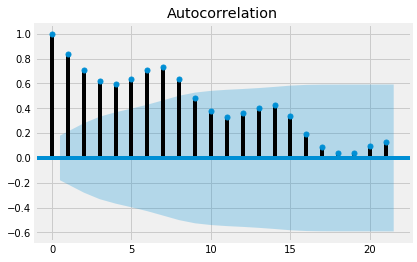

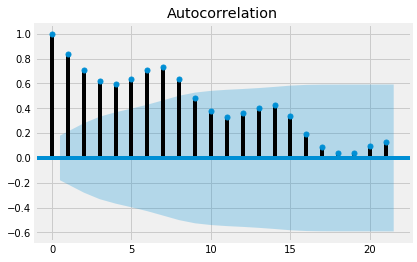

In [434]:
from statsmodels.graphics.tsaplots import plot_acf
#plot autocorrelation for each lag (alpha is confidence interval)
plot_acf(training_set[2:], alpha=.05)

In [107]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(actual_training, order=(4,2,5))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D2.confirmed   No. Observations:                  119
Model:                 ARIMA(4, 2, 5)   Log Likelihood               -1096.951
Method:                       css-mle   S.D. of innovations           2395.068
Date:                Wed, 29 Jul 2020   AIC                           2215.902
Time:                        16:06:19   BIC                           2246.473
Sample:                    03-12-2020   HQIC                          2228.316
                         - 07-08-2020                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                489.5856    314.736      1.556      0.120    -127.286    1106.458
ar.L1.D2.confirmed     1.3293      0.402      3.304      0.001       0.541       2.118
ar.L2.D2.confirmed  

In [83]:
pred_confirmed = model_fit.predict()

In [84]:
pred_confirmed=pd.DataFrame(pred_confirmed)

In [85]:
pred_confirmed.rename(columns={0:'confirmed'},inplace=True)

In [87]:
np.sqrt(metrics.mean_squared_error(pred_deaths, actual_training[2:]))
finding_confirmed(actual_training[2:],pred_confirmed)

224948.91334609338

In [94]:
pred_start_date = '2020-07-09'
pred_end_date ='2020-07-23'

In [95]:
predict=model_fit.predict(start=pred_start_date, end=pred_end_date)

In [97]:
finding_confirmed(testing_set_values,predict)

3565818.293530888

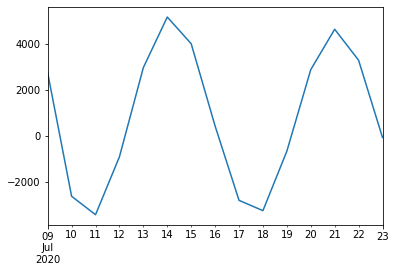

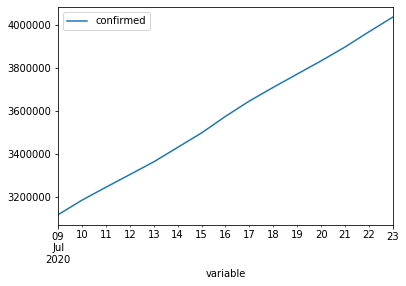

In [98]:
predict.plot()
testing_set_values.plot()


## Sarimax Confirmed

In [553]:
def finding_confirmed(training_set,forcast):
    pred_deaths = pd.DataFrame(forcast)
    pred_deaths.rename(columns={0:'confirmed'},inplace=True)
    x, x_diff = pred_deaths['confirmed'].iloc[0], pred_deaths['confirmed'].iloc[1:]
    pred_deaths['C'] = np.r_[x, x_diff].cumsum().astype(int)
    x, x_diff = pred_deaths['C'].iloc[0], pred_deaths['C'].iloc[1:]
    pred_deaths['D'] = np.r_[x, x_diff].cumsum().astype(int)
    x, x_diff = pred_deaths['D'].iloc[0], pred_deaths['D'].iloc[1:]
    pred_deaths['E'] = np.r_[x, x_diff].cumsum().astype(int)
    return np.sqrt(metrics.mean_squared_error(training_set, pred_deaths['E']))

In [555]:
confirmed_total_diff= confirmed_total['2020-03-10':].diff().diff().diff()
test_dates = '2020-07-10'
training_dates_start = '2020-03-10'
training_dates_end = '2020-07-08'
testing_set_values = confirmed_total_diff[test_dates:]
testing_set = confirmed_total_diff[test_dates:].drop('confirmed',axis=1)
training_set = confirmed_total_diff[training_dates_start:training_dates_end]
actual_training = confirmed_total[training_dates_start:training_dates_end]
actual_testing = confirmed_total[test_dates:]

In [556]:
mod = sm.tsa.statespace.SARIMAX(endog = actual_training['confirmed'], order=(5,3,4))
res = mod.fit(disp=False)
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:              confirmed   No. Observations:                  121
Model:               SARIMAX(5, 3, 4)   Log Likelihood               -1087.399
Date:                Wed, 29 Jul 2020   AIC                           2194.798
Time:                        19:56:47   BIC                           2222.505
Sample:                    03-10-2020   HQIC                          2206.048
                         - 07-08-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1271      0.297      0.428      0.669      -0.455       0.709
ar.L2         -0.6224      0.211     -2.947      0.003      -1.036      -0.208
ar.L3         -0.4396      0.198     -2.217      0.0

In [557]:
## Model Evaluation - Training Set
pred_confirmed = res.predict()

In [558]:
np.sqrt(metrics.mean_squared_error(actual_training, pred_confirmed))

2362.563192719202

In [561]:
predict_start_date = testing_set.index[0]
predict_end_date = testing_set.index[-1]

In [562]:
## Model Evaluation - Testing Set
predict__deaths_testing = res.predict(start=predict_start_date, end=predict_end_date)

In [563]:
np.sqrt(metrics.mean_squared_error(actual_testing, predict__deaths_testing))

18772.66093157903

## National causes of death

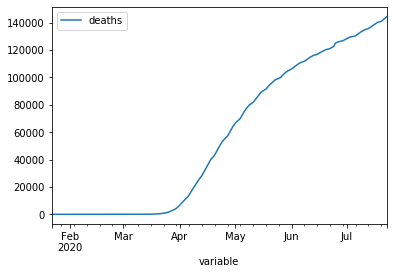

In [46]:
#aggregating to a national leve1
national_deaths =setting_index(cases_deaths)
national_deaths.rename(columns={'value':'deaths'}, inplace=True)
national_deaths.plot()

## Cases of Death

In [420]:
#Applying setting_index to every individual state
American_Samoa=setting_index(US_deaths[US_deaths['Province_State']=='American Samoa'])
Guam=setting_index(US_deaths[US_deaths['Province_State']=='Guam'])
Northern_Mariana_Islands=setting_index(US_deaths[US_deaths['Province_State']=='Northern Mariana Islands'])
Puerto_Rico=setting_index(US_deaths[US_deaths['Province_State']=='Puerto Rico'])
Virgin_Islands=setting_index(US_deaths[US_deaths['Province_State']=='Virgin Islands'])
Alabama=setting_index(US_deaths[US_deaths['Province_State']=='Alabama'])
Alaska=setting_index(US_deaths[US_deaths['Province_State']=='Alaska'])
Arizona=setting_index(US_deaths[US_deaths['Province_State']=='Arizona'])
Arkansas=setting_index(US_deaths[US_deaths['Province_State']=='Arkansas'])
California=setting_index(US_deaths[US_deaths['Province_State']=='California'])
Colorado=setting_index(US_deaths[US_deaths['Province_State']=='Colorado'])
Connecticut=setting_index(US_deaths[US_deaths['Province_State']=='Connecticut'])
Delaware=setting_index(US_deaths[US_deaths['Province_State']=='Delaware'])
District_of_Columbia=setting_index(US_deaths[US_deaths['Province_State']=='District of Columbia'])
Florida=setting_index(US_deaths[US_deaths['Province_State']=='Florida'])
Georgia=setting_index(US_deaths[US_deaths['Province_State']=='Georgia'])
Hawaii=setting_index(US_deaths[US_deaths['Province_State']=='Hawaii'])
Idaho=setting_index(US_deaths[US_deaths['Province_State']=='Idaho'])
Illinois=setting_index(US_deaths[US_deaths['Province_State']=='Illinois'])
Indiana=setting_index(US_deaths[US_deaths['Province_State']=='Indiana'])
Iowa=setting_index(US_deaths[US_deaths['Province_State']=='Iowa'])
Kansas=setting_index(US_deaths[US_deaths['Province_State']=='Kansas'])
Kentucky=setting_index(US_deaths[US_deaths['Province_State']=='Kentucky'])
Louisiana=setting_index(US_deaths[US_deaths['Province_State']=='Louisiana'])
Maine=setting_index(US_deaths[US_deaths['Province_State']=='Maine'])
Maryland=setting_index(US_deaths[US_deaths['Province_State']=='Maryland'])
Massachusetts=setting_index(US_deaths[US_deaths['Province_State']=='Massachusetts'])
Michigan=setting_index(US_deaths[US_deaths['Province_State']=='Michigan'])
Minnesota=setting_index(US_deaths[US_deaths['Province_State']=='Minnesota'])
Mississippi=setting_index(US_deaths[US_deaths['Province_State']=='Mississippi'])
Missouri=setting_index(US_deaths[US_deaths['Province_State']=='Missouri'])
Montana=setting_index(US_deaths[US_deaths['Province_State']=='Montana'])
Nebraska=setting_index(US_deaths[US_deaths['Province_State']=='Nebraska'])
Nevada=setting_index(US_deaths[US_deaths['Province_State']=='Nevada'])
New_Hampshire=setting_index(US_deaths[US_deaths['Province_State']=='New Hampshire'])
New_Jersey=setting_index(US_deaths[US_deaths['Province_State']=='New Jersey'])
New_Mexico=setting_index(US_deaths[US_deaths['Province_State']=='New Mexico'])
New_York=setting_index(US_deaths[US_deaths['Province_State']=='New York'])
North_Carolina=setting_index(US_deaths[US_deaths['Province_State']=='North Carolina'])
North_Dakota=setting_index(US_deaths[US_deaths['Province_State']=='North Dakota'])
Ohio=setting_index(US_deaths[US_deaths['Province_State']=='Ohio'])
Oklahoma=setting_index(US_deaths[US_deaths['Province_State']=='Oklahoma'])
Oregon=setting_index(US_deaths[US_deaths['Province_State']=='Oregon'])
Pennsylvania=setting_index(US_deaths[US_deaths['Province_State']=='Pennsylvania'])
Rhode_Island=setting_index(US_deaths[US_deaths['Province_State']=='Rhode Island'])
South_Carolina=setting_index(US_deaths[US_deaths['Province_State']=='South Carolina'])
South_Dakota=setting_index(US_deaths[US_deaths['Province_State']=='South Dakota'])
Tennessee=setting_index(US_deaths[US_deaths['Province_State']=='Tennessee'])
Texas=setting_index(US_deaths[US_deaths['Province_State']=='Texas'])
Utah=setting_index(US_deaths[US_deaths['Province_State']=='Utah'])
Vermont=setting_index(US_deaths[US_deaths['Province_State']=='Vermont'])
Virginia=setting_index(US_deaths[US_deaths['Province_State']=='Virginia'])
Washington=setting_index(US_deaths[US_deaths['Province_State']=='Washington'])
West_Virginia=setting_index(US_deaths[US_deaths['Province_State']=='West Virginia'])
Wisconsin=setting_index(US_deaths[US_deaths['Province_State']=='Wisconsin'])
Wyoming=setting_index(US_deaths[US_deaths['Province_State']=='Wyoming'])
Diamond_Princess=setting_index(US_deaths[US_deaths['Province_State']=='Diamond Princess'])
Grand_Princess=setting_index(US_deaths[US_deaths['Province_State']=='Grand Princess'])

In [421]:
American_Samoa.rename(columns={'value':US_deaths_states_string[0]},inplace=True)
Guam.rename(columns={'value':US_deaths_states_string[1]},inplace=True)
Northern_Mariana_Islands.rename(columns={'value':US_deaths_states_string[2]},inplace=True)
Puerto_Rico.rename(columns={'value':US_deaths_states_string[3]},inplace=True)
Virgin_Islands.rename(columns={'value':US_deaths_states_string[4]},inplace=True)
Alabama.rename(columns={'value':US_deaths_states_string[5]},inplace=True)
Alaska.rename(columns={'value':US_deaths_states_string[6]},inplace=True)
Arizona.rename(columns={'value':US_deaths_states_string[7]},inplace=True)
Arkansas.rename(columns={'value':US_deaths_states_string[8]},inplace=True)
California.rename(columns={'value':US_deaths_states_string[9]},inplace=True)
Colorado.rename(columns={'value':US_deaths_states_string[10]},inplace=True)
Connecticut.rename(columns={'value':US_deaths_states_string[11]},inplace=True)
Delaware.rename(columns={'value':US_deaths_states_string[12]},inplace=True)
District_of_Columbia.rename(columns={'value':US_deaths_states_string[13]},inplace=True)
Florida.rename(columns={'value':US_deaths_states_string[14]},inplace=True)
Georgia.rename(columns={'value':US_deaths_states_string[15]},inplace=True)
Hawaii.rename(columns={'value':US_deaths_states_string[16]},inplace=True)
Idaho.rename(columns={'value':US_deaths_states_string[17]},inplace=True)
Illinois.rename(columns={'value':US_deaths_states_string[18]},inplace=True)
Indiana.rename(columns={'value':US_deaths_states_string[19]},inplace=True)
Iowa.rename(columns={'value':US_deaths_states_string[20]},inplace=True)
Kansas.rename(columns={'value':US_deaths_states_string[21]},inplace=True)
Kentucky.rename(columns={'value':US_deaths_states_string[22]},inplace=True)
Louisiana.rename(columns={'value':US_deaths_states_string[23]},inplace=True)
Maine.rename(columns={'value':US_deaths_states_string[24]},inplace=True)
Maryland.rename(columns={'value':US_deaths_states_string[25]},inplace=True)
Massachusetts.rename(columns={'value':US_deaths_states_string[26]},inplace=True)
Michigan.rename(columns={'value':US_deaths_states_string[27]},inplace=True)
Minnesota.rename(columns={'value':US_deaths_states_string[28]},inplace=True)
Mississippi.rename(columns={'value':US_deaths_states_string[29]},inplace=True)
Missouri.rename(columns={'value':US_deaths_states_string[30]},inplace=True)
Montana.rename(columns={'value':US_deaths_states_string[31]},inplace=True)
Nebraska.rename(columns={'value':US_deaths_states_string[32]},inplace=True)
Nevada.rename(columns={'value':US_deaths_states_string[33]},inplace=True)
New_Hampshire.rename(columns={'value':US_deaths_states_string[34]},inplace=True)
New_Jersey.rename(columns={'value':US_deaths_states_string[35]},inplace=True)
New_Mexico.rename(columns={'value':US_deaths_states_string[36]},inplace=True)
New_York.rename(columns={'value':US_deaths_states_string[37]},inplace=True)
North_Carolina.rename(columns={'value':US_deaths_states_string[38]},inplace=True)
North_Dakota.rename(columns={'value':US_deaths_states_string[39]},inplace=True)
Ohio.rename(columns={'value':US_deaths_states_string[40]},inplace=True)
Oklahoma.rename(columns={'value':US_deaths_states_string[41]},inplace=True)
Oregon.rename(columns={'value':US_deaths_states_string[42]},inplace=True)
Pennsylvania.rename(columns={'value':US_deaths_states_string[43]},inplace=True)
Rhode_Island.rename(columns={'value':US_deaths_states_string[44]},inplace=True)
South_Carolina.rename(columns={'value':US_deaths_states_string[45]},inplace=True)
South_Dakota.rename(columns={'value':US_deaths_states_string[46]},inplace=True)
Tennessee.rename(columns={'value':US_deaths_states_string[47]},inplace=True)
Texas.rename(columns={'value':US_deaths_states_string[48]},inplace=True)
Utah.rename(columns={'value':US_deaths_states_string[49]},inplace=True)
Vermont.rename(columns={'value':US_deaths_states_string[50]},inplace=True)
Virginia.rename(columns={'value':US_deaths_states_string[51]},inplace=True)
Washington.rename(columns={'value':US_deaths_states_string[52]},inplace=True)
West_Virginia.rename(columns={'value':US_deaths_states_string[53]},inplace=True)
Wisconsin.rename(columns={'value':US_deaths_states_string[54]},inplace=True)
Wyoming.rename(columns={'value':US_deaths_states_string[55]},inplace=True)
Diamond_Princess.rename(columns={'value':US_deaths_states_string[56]},inplace=True)
Grand_Princess.rename(columns={'value':US_deaths_states_string[57]},inplace=True)

In [422]:
#Concat to show general distributions 
deaths_concat = pd.concat([American_Samoa, Guam, Northern_Mariana_Islands,
       Puerto_Rico, Virgin_Islands, Alabama, Alaska, Arizona,
       Arkansas, California, Colorado, Connecticut, Delaware,
       District_of_Columbia, Florida, Georgia, Hawaii, Idaho,
       Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana,
       Maine, Maryland, Massachusetts, Michigan, Minnesota,
       Mississippi, Missouri, Montana, Nebraska, Nevada,
       New_Hampshire, New_Jersey, New_Mexico, New_York,
       North_Carolina, North_Dakota, Ohio, Oklahoma, Oregon,
       Pennsylvania, Rhode_Island, South_Carolina, South_Dakota,
       Tennessee, Texas, Utah, Vermont, Virginia, Washington,
       West_Virginia, Wisconsin, Wyoming, Diamond_Princess,
       Grand_Princess], axis=1)

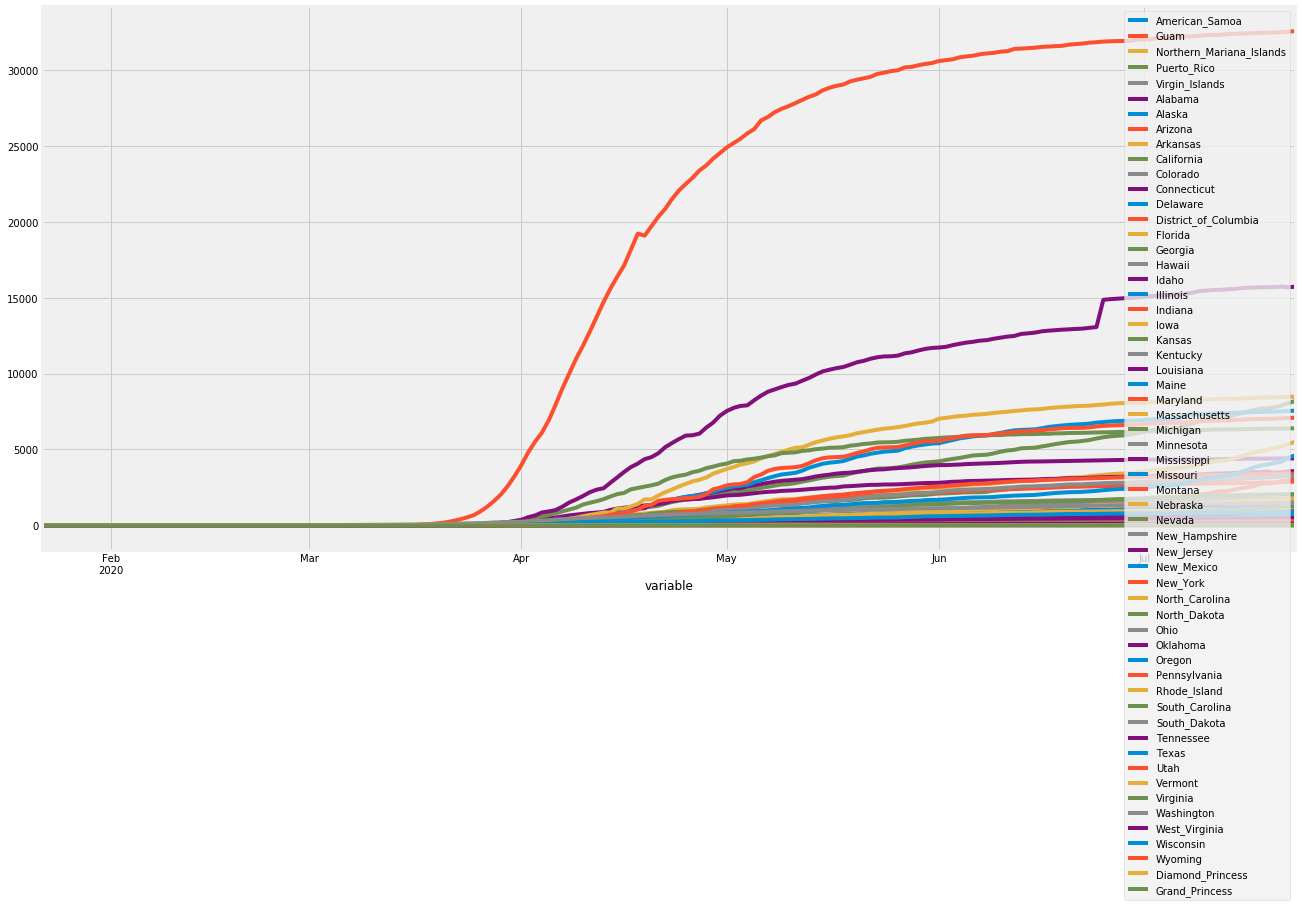

In [423]:
deaths_concat.plot(figsize=(20,10))


In [424]:
#Map most confirmed regions
import folium
import json
data_temp = US_deaths.groupby(["Province_State"]).sum().reset_index().drop(["Lat","Long_"],axis=1)
data_temp["Confirmed_log"] = np.log10(data_temp["value"]+1)
bins = list(data_temp['Confirmed_log'].quantile([0, 0.25, 0.5, 0.75,0.95 ,1]))
m = folium.Map(location=[37, -102], zoom_start=4,max_zoom=6,min_zoom=3)
f = open('state_geo.json',)
state_geo = json.load(f)
folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data = data_temp,
    columns=['Province_State', 'Confirmed_log'],
    key_on='feature.properties.name',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.2,
    bins = bins,
    reset=True,
    legend_name='Confirmed cases log (10^x)'
).add_to(m)
folium.LayerControl().add_to(m)

legend_html = "<div style='padding:10px;background-color:rgba(255,255,255,0.5);position:fixed;bottom:20px;left:20px;z-index:1000'>"
legend_html += "<div style='width:100%;text-align:center;'><h4>Index for Legend</h4></div><hr style='border-top-color: rgba(25,25,25,0.5);'>"
legend_html += "<ul style='margin:0;padding:0;color: #555;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"
for i in bins:
    legend_html += "<li style='margin:0;padding:0;line-height: 0;'>Value "+str(np.round(i,2))+" : "+str(int(10**i)-1)+"</li><br>"
legend_html += "</ul></div>"
m.get_root().html.add_child(folium.Element(legend_html))
m

## Holdout testing deaths


In [425]:
#Total national amount of deaths
death_total = pd.DataFrame(national_deaths)

### Dickey fuller test for stationary

In [383]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(death_total.deaths)
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                  -0.252472
p-value                          0.931971
#Lags Used                      11.000000
Number of Observations Used    172.000000
dtype: float64


In [384]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(death_total.deaths.diff()[1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                  -1.962807
p-value                          0.303115
#Lags Used                      10.000000
Number of Observations Used    171.000000
dtype: float64


In [385]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(death_total.deaths.diff().diff()[2:-2])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                  -2.685468
p-value                          0.076587
#Lags Used                       9.000000
Number of Observations Used    170.000000
dtype: float64


Oure rejection region is 0.1 instead. Therefore, we concluded that the data is stationary

In [389]:
death_total_diff1= death_total['2020-03-10':].diff()
death_total_diff2=death_total_diff1
test_dates = '2020-07-09'
training_dates_start = '2020-03-10'
training_dates_end = '2020-07-08'
testing_set_values = death_total_diff2[test_dates:]
testing_set = death_total_diff2[test_dates:].drop('deaths',axis=1)
training_set = death_total_diff2[training_dates_start:training_dates_end]
actual_training = death_total[training_dates_start:training_dates_end]
actual_testing = death_total[test_dates:]
whole_set = death_total[training_dates_start:]

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [2020-03-10] of <class 'str'>

In [131]:
def finding(training_set,forcast):
    pred_deaths = pd.DataFrame(forcast)
    pred_deaths.rename(columns={0:'death'},inplace=True)
    x, x_diff = pred_deaths['death'].iloc[0], pred_deaths['death'].iloc[1:]
    pred_deaths['C'] = np.r_[x, x_diff].cumsum().astype(int)
    x, x_diff = pred_deaths['C'].iloc[0], pred_deaths['C'].iloc[1:]
    pred_deaths['D'] = np.r_[x, x_diff].cumsum().astype(int)
    return np.sqrt(metrics.mean_squared_error(training_set, pred_deaths['D']))



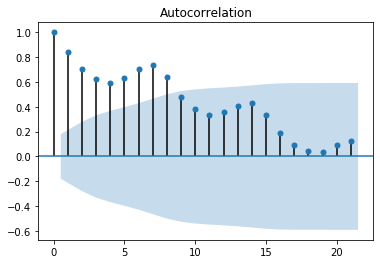

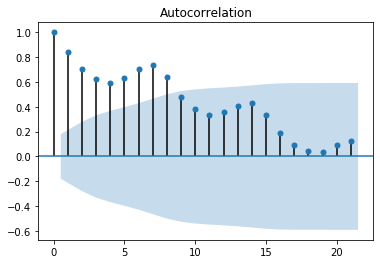

In [132]:
from statsmodels.graphics.tsaplots import plot_acf
#plot autocorrelation for each lag (alpha is confidence interval)
plot_acf(training_set[2:], alpha=.05)

In [133]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(actual_training, order=(3,2,5))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:              D2.deaths   No. Observations:                  119
Model:                 ARIMA(3, 2, 5)   Log Likelihood                -846.452
Method:                       css-mle   S.D. of innovations            293.195
Date:                Wed, 29 Jul 2020   AIC                           1712.904
Time:                        16:59:01   BIC                           1740.696
Sample:                    03-12-2020   HQIC                          1724.190
                         - 07-08-2020                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.0650     14.739      0.479      0.632     -21.823      35.953
ar.L1.D2.deaths     1.1735      0.350      3.352      0.001       0.487       1.860
ar.L2.D2.deaths    -0.8949      

In [134]:
pred_deaths = model_fit.predict()

In [135]:
pred_deaths=pd.DataFrame(pred_deaths)

In [136]:
pred_deaths.rename(columns={0:'death'},inplace=True)

In [137]:
np.sqrt(metrics.mean_squared_error(pred_deaths, actual_training[2:]))
finding(actual_training[2:],pred_deaths)

113510.73608150335

In [138]:
predict=model_fit.predict(start=pred_start_date, end=pred_end_date)

In [139]:
np.sqrt(metrics.mean_squared_error(predict, testing_set_values))
finding(testing_set_values,predict)

484.56943086964674

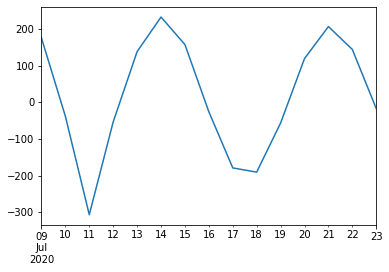

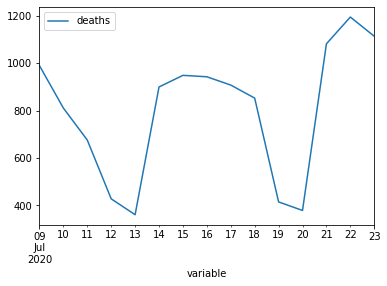

In [140]:
predict.plot()
testing_set_values.plot()

## Sarimax Death 

In [390]:
death_total_diff1= death_total['2020-03-10':].diff()
death_total_diff2=death_total_diff1.diff()
test_dates = '2020-07-10'
training_dates_start = '2020-03-10'
training_dates_end = '2020-07-09'
testing_set_values = death_total_diff2[test_dates:]
testing_set = death_total_diff2[test_dates:].drop('deaths',axis=1)
training_set = death_total_diff2[training_dates_start:training_dates_end]
actual_training = death_total[training_dates_start:training_dates_end]
actual_testing = death_total[test_dates:]

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [2020-03-10] of <class 'str'>

In [142]:
mod = sm.tsa.statespace.SARIMAX(training_set['deaths'], order=(1,3,4))
res = mod.fit(disp=False)
print(res.summary())

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:                 deaths   No. Observations:                  121
Model:               SARIMAX(1, 2, 4)   Log Likelihood                -890.472
Date:                Wed, 29 Jul 2020   AIC                           1792.943
Time:                        16:59:02   BIC                           1809.618
Sample:                    03-10-2020   HQIC                          1799.715
                         - 07-08-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000    836.471     -0.001      0.999   -1640.454    1638.454
ma.L1         -1.1070   1717.038     -0.001      0.999   -3366.439    3364.225
ma.L2         -0.8859   2740.502     -0.000      1.0

In [143]:
## Model Evaluation - Training Set
pred_deaths = res.predict()

In [144]:
finding(actual_training,pred_deaths)

68777.26336725864

In [145]:
predict_start_date = testing_set.index[0]
predict_end_date = testing_set.index[-1]

In [146]:
## Model Evaluation - Testing Set
predict__deaths_testing = res.predict(start=predict_start_date, end=predict_end_date)

In [147]:
finding(actual_testing,predict__deaths_testing)

136880.812671619

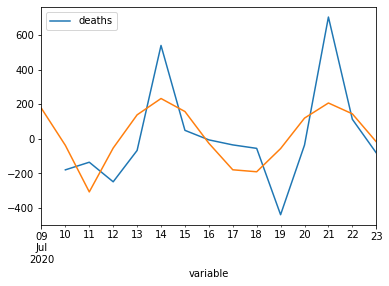

In [148]:
testing_set_values.plot()
predict.plot()

## Muriel

In [149]:
con=pd.read_csv('time_series_covid19_confirmed_US.csv')

In [150]:
melt_con = pd.melt(con, id_vars=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key'])
melt_con['variable'] = pd.to_datetime(melt_con['variable'], infer_datetime_format=True)
melt_con=melt_con.rename(columns={'value': 'confirmed'})
melt_con.set_index('variable',inplace=True)
melt_con.loc[melt_con['Province_State'] == 'Guam'].confirmed.sum()


22277

In [151]:
death=pd.read_csv('time_series_covid19_deaths_US.csv')
melt_death = pd.melt(death, id_vars=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key','Population'])
melt_death['variable'] = pd.to_datetime(melt_death['variable'], infer_datetime_format=True)
melt_death=melt_death.rename(columns={'value': 'deaths'})
melt_death.set_index('variable',inplace=True)


In [152]:
melt_con['Population'] = pd.Series(melt_death['Population'])
melt_con.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,confirmed,Population
variable,,,,,,,,,,,,,
2020-01-22,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",0,55641
2020-01-22,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",0,164229
2020-01-22,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",0,55144
2020-01-22,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",0,19483
2020-01-22,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",0,41959


In [153]:
melt_death['confirmed'] = pd.Series(melt_con['confirmed'])
df_combined = melt_death

In [154]:
co=melt_con.reset_index()
a=co.loc[co.variable=='2020-07-23']
aa=a.groupby('Province_State').confirmed.sum()
af = pd.DataFrame(aa)

In [155]:
de=melt_death.reset_index()
s = de.loc[de.variable == '2020-07-23']
sa= s.groupby('Province_State').deaths.sum()
ab=pd.DataFrame(sa)

In [156]:
df_last=ab.join(af)

In [157]:
df_last.sort_values("confirmed",ascending=False).style.background_gradient(cmap='Blues',subset=["confirmed"]).background_gradient(cmap='Reds',subset=["deaths"])



,deaths,confirmed
Province_State,,
California,8201,430773
New York,32594,409697
Florida,5518,389868
Texas,4622,373037
New Jersey,15730,177887
Illinois,7560,168096
Georgia,3361,156607
Arizona,3063,152944
Massachusetts,8484,114647


In [158]:
df_last.sort_values('confirmed',ascending=False)[:10].style.background_gradient(cmap='Blues',subset=["confirmed"])\
                        .background_gradient(cmap='Reds',subset=["deaths"])

,deaths,confirmed
Province_State,,
California,8201,430773
New York,32594,409697
Florida,5518,389868
Texas,4622,373037
New Jersey,15730,177887
Illinois,7560,168096
Georgia,3361,156607
Arizona,3063,152944
Massachusetts,8484,114647


In [159]:
merged_inner = pd.merge(left=a,right=s,how='left')

In [284]:
list(US_deaths[US_deaths['Province_State']=='New York']['Combined_Key'].unique())


['Albany, New York, US',
 'Allegany, New York, US',
 'Bronx, New York, US',
 'Broome, New York, US',
 'Cattaraugus, New York, US',
 'Cayuga, New York, US',
 'Chautauqua, New York, US',
 'Chemung, New York, US',
 'Chenango, New York, US',
 'Clinton, New York, US',
 'Columbia, New York, US',
 'Cortland, New York, US',
 'Delaware, New York, US',
 'Dutchess, New York, US',
 'Erie, New York, US',
 'Essex, New York, US',
 'Franklin, New York, US',
 'Fulton, New York, US',
 'Genesee, New York, US',
 'Greene, New York, US',
 'Hamilton, New York, US',
 'Herkimer, New York, US',
 'Jefferson, New York, US',
 'Kings, New York, US',
 'Lewis, New York, US',
 'Livingston, New York, US',
 'Madison, New York, US',
 'Monroe, New York, US',
 'Montgomery, New York, US',
 'Nassau, New York, US',
 'New York City, New York, US',
 'Niagara, New York, US',
 'Oneida, New York, US',
 'Onondaga, New York, US',
 'Ontario, New York, US',
 'Orange, New York, US',
 'Orleans, New York, US',
 'Oswego, New York, US',
 '

# Confirmed Lockdown and reopening


## Top 5 number of population and confirmed

Red line is the lockdown date, green line is the reopening, purple is july 4th, and orange is memorial weekend

In [364]:
US_confirmed.set_index('variable',inplace=True)

KeyError: "None of ['variable'] are in the columns"

In [365]:
#Most Populated Regions
merged_inner.loc[:,['Population',"Province_State","confirmed","deaths","Admin2"]].sort_values("Population",ascending=False).set_index("Admin2")[:5].style.background_gradient(cmap='Blues',subset=["confirmed"])\
                        .background_gradient(cmap='Reds',subset=["deaths"])

,Population,Province_State,confirmed,deaths
Admin2,,,,
Los Angeles,10039107,California,166868,4263
New York,8336817,New York,222832,23463
Cook,5150233,Illinois,100795,4810
Harris,4713325,Texas,61411,597
Maricopa,4485414,Arizona,102247,1651


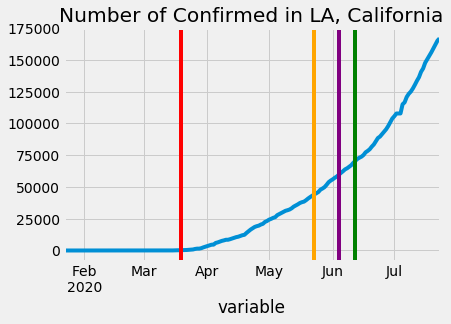

In [367]:
US_confirmed[US_confirmed['Combined_Key']=='Los Angeles, California, US']['value'].plot()
plt.axvline('2020-03-19',color='red')
plt.axvline('2020-06-12',color='green')
plt.axvline('2020-06-04',color='purple')
plt.axvline('2020-05-23',color='orange')
plt.title('Number of Confirmed in LA, California');

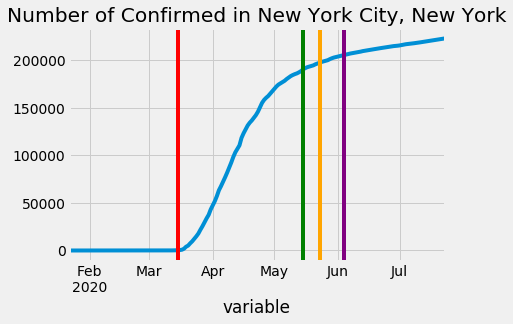

In [368]:
US_confirmed[US_confirmed['Combined_Key']=='New York City, New York, US']['value'].plot()
plt.axvline('2020-03-15',color='red')
plt.axvline('2020-05-15',color='green')
plt.axvline('2020-06-04',color='purple')
plt.axvline('2020-05-23',color='orange')
plt.title('Number of Confirmed in New York City, New York');

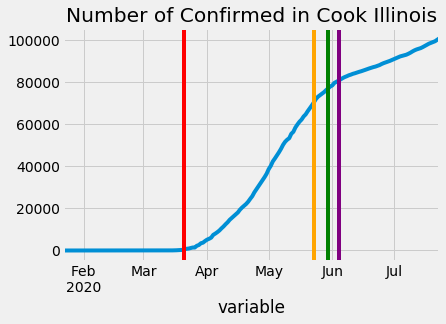

In [369]:
US_confirmed[US_confirmed['Combined_Key']=='Cook, Illinois, US']['value'].plot()
plt.axvline('2020-03-21',color='red')
plt.axvline('2020-05-30',color='green')
plt.axvline('2020-06-04',color='purple')
plt.axvline('2020-05-23',color='orange')
plt.title('Number of Confirmed in Cook Illinois');

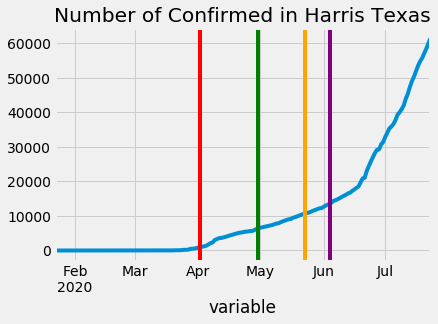

In [370]:
US_confirmed[US_confirmed['Combined_Key']=='Harris, Texas, US']['value'].plot()
plt.axvline('2020-04-02',color='red')
plt.axvline('2020-04-30',color='green')
plt.axvline('2020-06-04',color='purple')
plt.axvline('2020-05-23',color='orange')
plt.title('Number of Confirmed in Harris Texas');

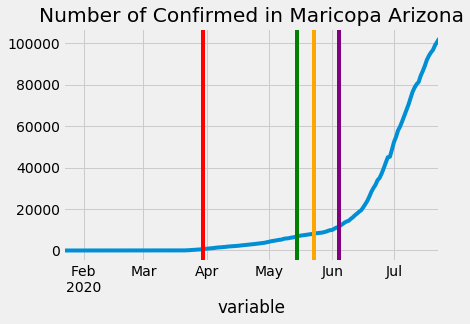

In [371]:
US_confirmed[US_confirmed['Combined_Key']=='Maricopa, Arizona, US']['value'].plot()
plt.axvline('2020-03-30',color='red')
plt.axvline('2020-05-15',color='green')
plt.axvline('2020-06-04',color='purple')
plt.axvline('2020-05-23',color='orange')
plt.title('Number of Confirmed in Maricopa Arizona');

As we can see by the top most populated regions, those regions that were in lockdown for longer periods seem to have a slower growth rate after reopening. However, populated regions that had a shorter lockdown, seem to have faster growth rate of confirmed cases after reopening.

## Median number of population and confirmed

In [314]:
#Median Populated Regions
merged_inner.loc[:,['Population',"Province_State","confirmed","deaths","Admin2"]].sort_values("Population",ascending=True).set_index("Admin2")[900:905].style.background_gradient(cmap='Blues',subset=["confirmed"])\
                        .background_gradient(cmap='Reds',subset=["deaths"])

,Population,Province_State,confirmed,deaths
Admin2,,,,
Candler,10803,Georgia,148,1
West Carroll,10830,Louisiana,213,5
Camden,10867,North Carolina,50,2
Watonwan,10897,Minnesota,283,0
Owen,10901,Kentucky,25,0


Text(0.5, 1.0, 'Number of Confirmed in Candler Georgia')

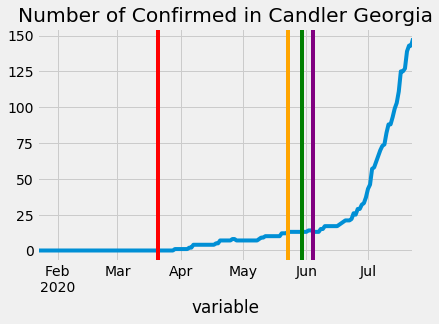

In [372]:
US_confirmed[US_confirmed['Combined_Key']=='Candler, Georgia, US']['value'].plot()
plt.axvline('2020-03-21',color='red')
plt.axvline('2020-05-30',color='green')
plt.axvline('2020-06-04',color='purple')
plt.axvline('2020-05-23',color='orange')
plt.title('Number of Confirmed in Candler Georgia')

Text(0.5, 1.0, 'Number of Confirmed in West Carroll Louisiana')

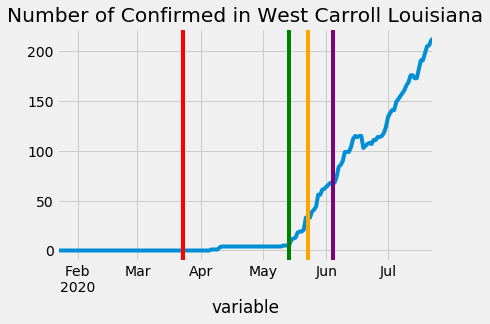

In [373]:
US_confirmed[US_confirmed['Combined_Key']=='West Carroll, Louisiana, US']['value'].plot()
plt.axvline('2020-03-23',color='red')
plt.axvline('2020-05-14',color='green')
plt.axvline('2020-06-04',color='purple')
plt.axvline('2020-05-23',color='orange')
plt.title('Number of Confirmed in West Carroll Louisiana')

Text(0.5, 1.0, 'Number of Confirmed in Camden North Carolina')

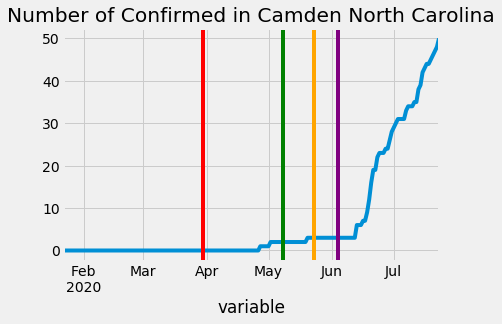

In [374]:
US_confirmed[US_confirmed['Combined_Key']=='Camden, North Carolina, US']['value'].plot()
plt.axvline('2020-03-30',color='red')
plt.axvline('2020-05-08',color='green')
plt.axvline('2020-06-04',color='purple')
plt.axvline('2020-05-23',color='orange')
plt.title('Number of Confirmed in Camden North Carolina')

As we can see in the regions around the median of populations, they tend to have an exponential growth of cases after reopening. We reccomend a longer lockdown period. There is also a rapid increase in the growth rate of confirmed cases in most regions on July 4th. 

In [321]:
#Least Populated Regions
merged_inner.loc[:,['Population',"Province_State","confirmed","deaths","Admin2"]].sort_values("Population",ascending=True).set_index("Admin2")[:5].style.background_gradient(cmap='Blues',subset=["confirmed"])\
                        .background_gradient(cmap='Reds',subset=["deaths"])

,Population,Province_State,confirmed,deaths
Admin2,,,,
Weber-Morgan,0,Utah,2201,24
Out of NM,0,New Mexico,0,0
Out of NY,0,New York,0,0
Out of NC,0,North Carolina,0,0
Out of ND,0,North Dakota,0,0


We did not decide to plot the least populated because the number of confirmed and deaths were not significant.

# Deaths Lockdown and reopening


## Top 5 number of population and deaths

In [ ]:
US_deaths.set_index('variable',inplace=True)

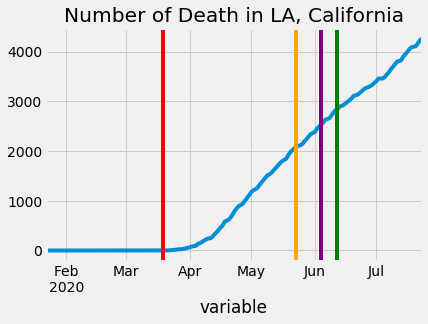

In [375]:
US_deaths[US_deaths['Combined_Key']=='Los Angeles, California, US']['value'].plot()
plt.axvline('2020-03-19',color='red')
plt.axvline('2020-06-12',color='green')
plt.axvline('2020-06-04',color='purple')
plt.axvline('2020-05-23',color='orange')
plt.title('Number of Death in LA, California');

Text(0.5, 1.0, 'Number of Death in New York City, New York')

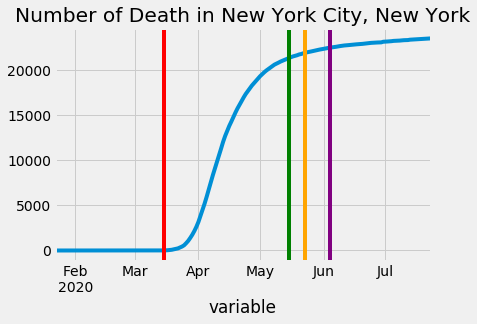

In [376]:
US_deaths[US_deaths['Combined_Key']=='New York City, New York, US']['value'].plot()
plt.axvline('2020-03-15',color='red')
plt.axvline('2020-05-15',color='green')
plt.axvline('2020-06-04',color='purple')
plt.axvline('2020-05-23',color='orange')
plt.title('Number of Death in New York City, New York')

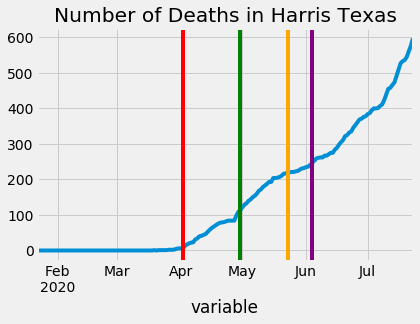

In [377]:
US_deaths[US_deaths['Combined_Key']=='Harris, Texas, US']['value'].plot()
plt.axvline('2020-04-02',color='red')
plt.axvline('2020-04-30',color='green')
plt.axvline('2020-06-04',color='purple')
plt.axvline('2020-05-23',color='orange')
plt.title('Number of Deaths in Harris Texas');

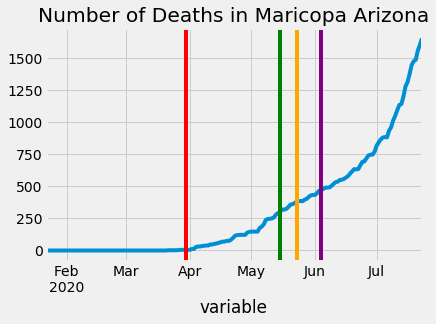

In [378]:
US_deaths[US_deaths['Combined_Key']=='Maricopa, Arizona, US']['value'].plot()
plt.axvline('2020-03-30',color='red')
plt.axvline('2020-05-15',color='green')
plt.axvline('2020-06-04',color='purple')
plt.axvline('2020-05-23',color='orange')
plt.title('Number of Deaths in Maricopa Arizona');

## Median number of population and deaths

Text(0.5, 1.0, 'Number of Death in Candler Georgia')

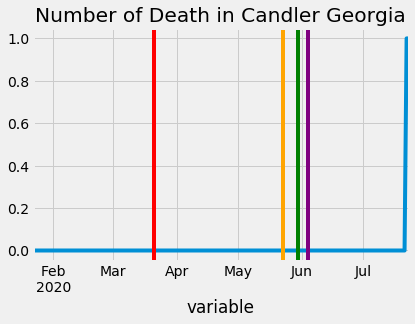

In [379]:
US_deaths[US_deaths['Combined_Key']=='Candler, Georgia, US']['value'].plot()
plt.axvline('2020-03-21',color='red')
plt.axvline('2020-05-30',color='green')
plt.axvline('2020-06-04',color='purple')
plt.axvline('2020-05-23',color='orange')
plt.title('Number of Death in Candler Georgia')

Text(0.5, 1.0, 'Number of Death in West Carroll Louisiana')

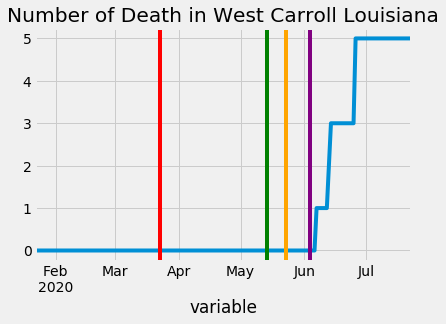

In [380]:
US_deaths[US_deaths['Combined_Key']=='West Carroll, Louisiana, US']['value'].plot()
plt.axvline('2020-03-23',color='red')
plt.axvline('2020-05-14',color='green')
plt.axvline('2020-06-04',color='purple')
plt.axvline('2020-05-23',color='orange')

plt.title('Number of Death in West Carroll Louisiana')

Text(0.5, 1.0, 'Number of Deaths in Camden North Carolina')

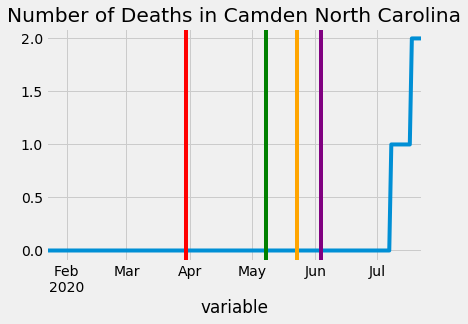

In [381]:
US_deaths[US_deaths['Combined_Key']=='Camden, North Carolina, US']['value'].plot()
plt.axvline('2020-03-30',color='red')
plt.axvline('2020-05-08',color='green')
plt.axvline('2020-06-04',color='purple')
plt.axvline('2020-05-23',color='orange')
plt.title('Number of Deaths in Camden North Carolina')

Similar results as confirmed cases.

# Protesting regions affect corona?

There was no Minneapolis in our dataset

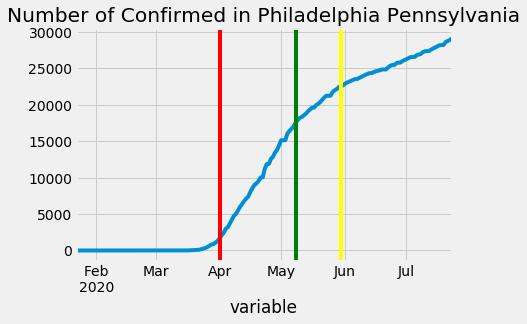

In [362]:
US_confirmed[US_confirmed['Combined_Key']=='Philadelphia, Pennsylvania, US']['value'].plot()
plt.axvline('2020-04-01',color='red')
plt.axvline('2020-05-08',color='green')
plt.axvline('2020-05-30',color='yellow')

plt.title('Number of Confirmed in Philadelphia Pennsylvania');

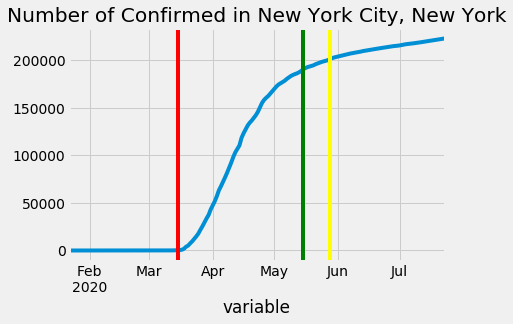

In [361]:
US_confirmed[US_confirmed['Combined_Key']=='New York City, New York, US']['value'].plot()
plt.axvline('2020-03-15',color='red')
plt.axvline('2020-05-15',color='green')
plt.axvline('2020-05-28',color='yellow')
plt.title('Number of Confirmed in New York City, New York');

As we can see in the major areas, the protests did not significantly impact the growth rate of confirmed cases

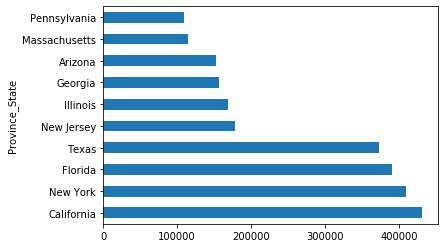

In [161]:
top10=df_last['confirmed'].sort_values(ascending=False)[:10]
top10.plot(kind='barh')

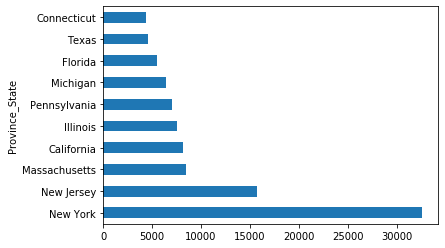

In [162]:
top10=df_last['deaths'].sort_values(ascending=False)[:10]
top10.plot(kind='barh')

In [163]:
df_last.sort_values('confirmed')["confirmed"].index[-10:]


Index(['Pennsylvania', 'Massachusetts', 'Arizona', 'Georgia', 'Illinois',
       'New Jersey', 'Texas', 'Florida', 'New York', 'California'],
      dtype='object', name='Province_State')

In [164]:
df_last.sort_values('confirmed')["confirmed"].values[-10:]

array([109037, 114647, 152944, 156607, 168096, 177887, 373037, 389868,
       409697, 430773])

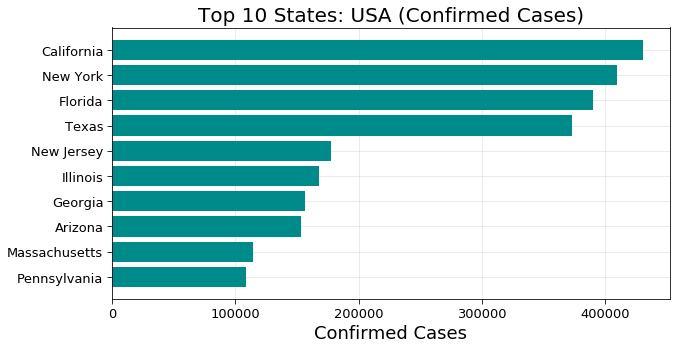

In [165]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_last.sort_values('confirmed')["confirmed"].index[-10:],df_last.sort_values('confirmed')["confirmed"].values[-10:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 States: USA (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)

# Separating confirmed and death for models

In [167]:
confirmed_model = pd.DataFrame(df_combined.groupby('variable').confirmed.sum())
death_model = pd.DataFrame(df_combined.groupby('variable').deaths.sum())


In [168]:
cm= confirmed_model.reset_index()
cm1=cm.drop('variable',axis=1)

In [169]:
weekly_confirmed=confirmed_model.resample('W').max()
weekly_death=death_model.resample('W').max()

In [170]:
w= weekly_confirmed.reset_index()
w1=w.drop('variable',axis=1)


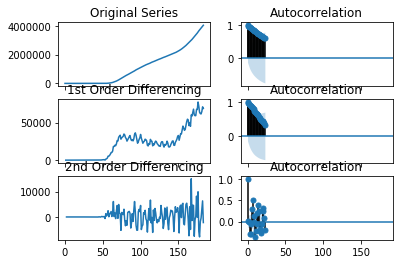

In [171]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(cm1.confirmed); axes[0, 0].set_title('Original Series')
plot_acf(cm1.confirmed, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(cm1.confirmed.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(cm1.confirmed.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(cm1.confirmed.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(cm1.confirmed.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [172]:
# # PACF plot of 1st differenced series
# plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# fig, axes = plt.subplots(1, 2, sharex=True)
# axes[0].plot(cm1.confirmed.diff().diff()); axes[0].set_title('1st Differencing')
# axes[1].set(ylim=(0,5))
# plot_pacf(cm1.confirmed.diff().diff().dropna(), ax=axes[1])

# plt.show()

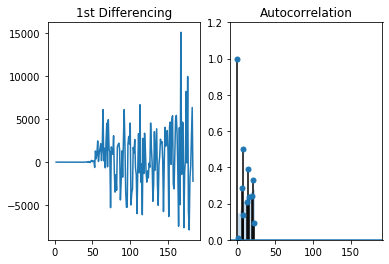

In [173]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(cm1.confirmed.diff().diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(cm1.confirmed.diff().diff().dropna(), ax=axes[1])
plt.show()

In [174]:
diff = weekly_confirmed.diff().rename(index=str, columns={"confirmed": "confirmed_difference"})


In [175]:
diff2 = diff.diff().rename(index=str, columns={"confirmed": "confirmed_difference"})



In [176]:
diff3 = diff2.diff().rename(index=str, columns={"confirmed": "confirmed_difference"})



In [177]:
## from statsmodels.tsa.stattools import adfuller
test = adfuller(diff2['confirmed_difference'][2:])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                 -3.163286
p-value                         0.022211
#Lags Used                      3.000000
Number of Observations Used    21.000000
dtype: float64


In [178]:
'''
(BY THE WEEK) weekly_confirmed=confirmed_model.resample('W').max() &diff2[2:](p=.02 & 3 lags)

(BY THE DAY) confirmed_model & diff3[3:](p=.019 &14lags)
    cm1 diff 2
'''

"\n(BY THE WEEK) weekly_confirmed=confirmed_model.resample('W').max() &diff2[2:](p=.02 & 3 lags)\n\n(BY THE DAY) confirmed_model & diff3[3:](p=.019 &14lags)\n    cm1 diff 2\n"

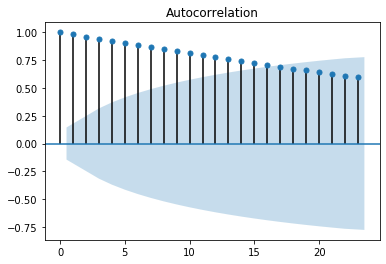

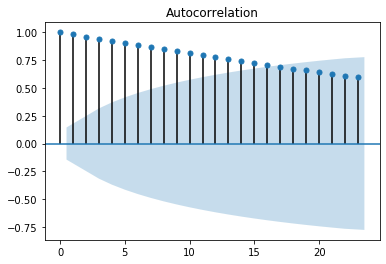

In [179]:
#ACF/PACF to determine which terms in include (MA or AR or Both?)
from statsmodels.graphics.tsaplots import plot_acf
#plot autocorrelation for each lag (alpha is confidence interval)
plot_acf(cm1, alpha=.05)

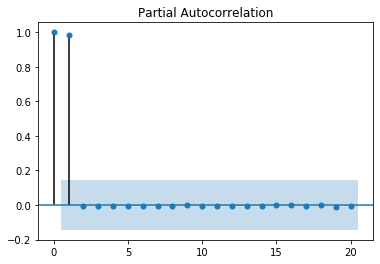

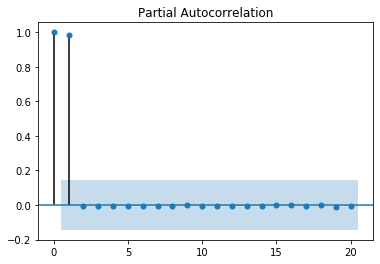

In [180]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(cm1, alpha=.05, lags=20)

In [181]:
from statsmodels.tsa.arima_model import ARIMA
#fit ARIMA model (3,1,0))
model = ARIMA(confirmed_model, order=(1,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D2.confirmed   No. Observations:                  182
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -1719.555
Method:                       css-mle   S.D. of innovations           3068.852
Date:                Wed, 29 Jul 2020   AIC                           3447.109
Time:                        16:59:08   BIC                           3459.925
Sample:                    01-24-2020   HQIC                          3452.305
                         - 07-23-2020                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                377.7042    165.334      2.284      0.022      53.656     701.752
ar.L1.D2.confirmed     0.5994      0.135      4.425      0.000       0.334       0.865
ma.L1.D2.confirmed  

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



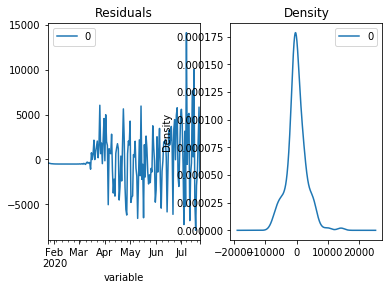

In [182]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

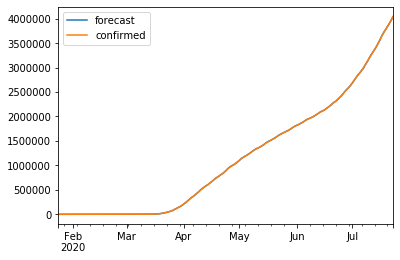

In [183]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [184]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(confirmed_model, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA(1,2,1)x(0,0,0,0) [intercept=True]; AIC=3450.612, BIC=3463.428, Time=0.064 seconds
Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=True]; AIC=3446.590, BIC=3452.998, Time=0.012 seconds
Fit ARIMA(1,2,0)x(0,0,0,0) [intercept=True]; AIC=3448.579, BIC=3458.191, Time=0.028 seconds
Fit ARIMA(0,2,1)x(0,0,0,0) [intercept=True]; AIC=3448.620, BIC=3458.232, Time=0.027 seconds
Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=False]; AIC=3447.279, BIC=3450.483, Time=0.010 seconds
Total fit time: 0.155 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  184
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1721.295
Date:                Wed, 29 Jul 2020   AIC                           3446.590
Time:                        16:59:09   BIC                           3452.998
Sample:                             0   HQIC                          3

In [185]:
# Create Training and Test
train = confirmed_model[:'2020-06-07']
test = confirmed_model['2020-06-08':]

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



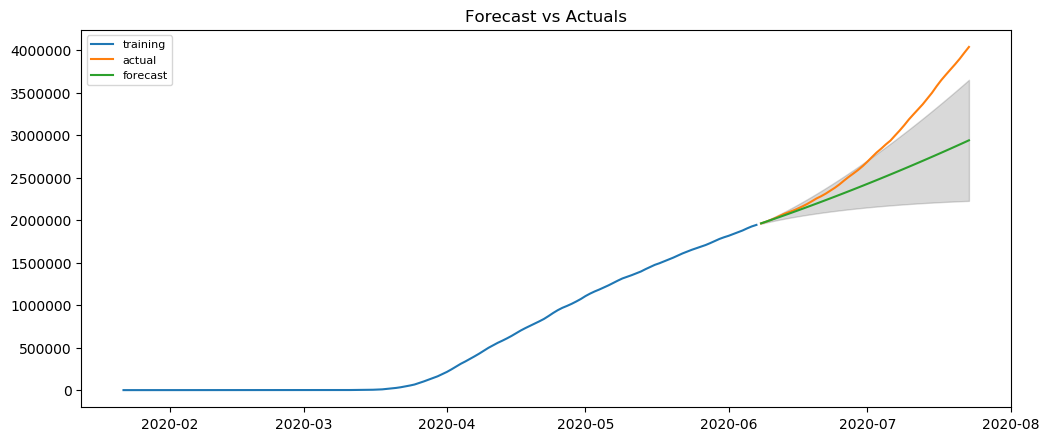

In [186]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 2, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(46, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Weekly deaths

In [187]:
x = pd.DataFrame(df_combined.groupby('variable').deaths.sum())

In [188]:
weekly_death=death_model.resample('W').max()

In [189]:
weekly_death_ = weekly_death.reset_index()
weekly_death_drop=weekly_death_.drop('variable',axis=1)

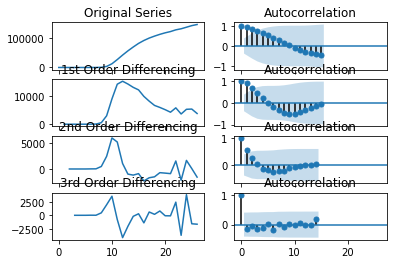

In [190]:
# Original Series
fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(weekly_death_drop.deaths); axes[0, 0].set_title('Original Series')
plot_acf(weekly_death_drop.deaths, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(weekly_death_drop.deaths.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(weekly_death_drop.deaths.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(weekly_death_drop.deaths.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(weekly_death_drop.deaths.diff().diff().dropna(), ax=axes[2, 1])

axes[3, 0].plot(weekly_death_drop.deaths.diff().diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(weekly_death_drop.deaths.diff().diff().diff().dropna(), ax=axes[3, 1])




plt.show()

In [191]:
death_diff = death_model.diff().rename(index=str, columns={"deaths": "death_difference"})


In [192]:
death_diff2 = death_model.diff().rename(index=str, columns={"deaths": "death_difference"})


In [193]:
death_diff3 = death_model.diff().rename(index=str, columns={"deaths": "death_difference"})


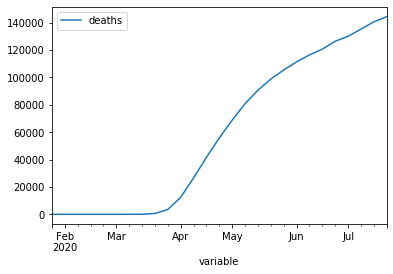

In [194]:
weekly_death.plot()

In [195]:
## from statsmodels.tsa.stattools import adfuller
test = adfuller(weekly_death['deaths'])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                 -2.975333
p-value                         0.037263
#Lags Used                      9.000000
Number of Observations Used    17.000000
dtype: float64


In [196]:
'''
weekly_death=death_model.resample('W').max() (p=0.04 & 9lags)
'''

"\nweekly_death=death_model.resample('W').max() (p=0.04 & 9lags)\n"

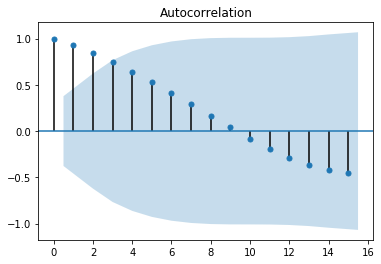

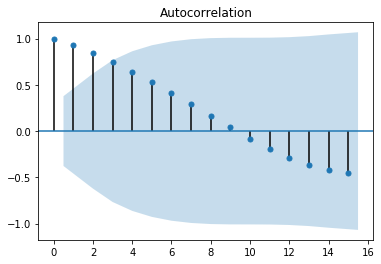

In [197]:
#ACF/PACF to determine which terms in include (MA or AR or Both?)
from statsmodels.graphics.tsaplots import plot_acf
#plot autocorrelation for each lag (alpha is confidence interval)
plot_acf(weekly_death, alpha=.05)

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning:

invalid value encountered in sqrt



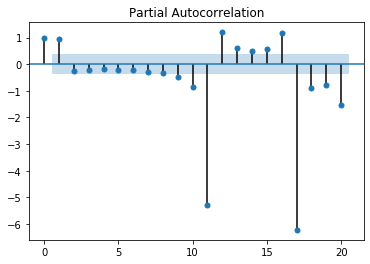

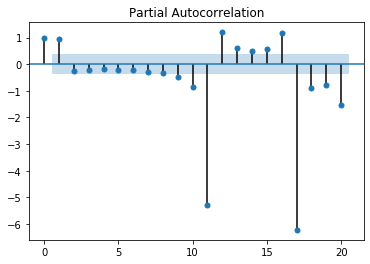

In [198]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(weekly_death, alpha=.05, lags=20)

In [199]:
from statsmodels.tsa.arima_model import ARIMA
#fit ARIMA model (3,1,0))

model = ARIMA(weekly_death, order=(2,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                 deaths   No. Observations:                   27
Model:                     ARMA(2, 1)   Log Likelihood                -242.317
Method:                       css-mle   S.D. of innovations           1569.552
Date:                Wed, 29 Jul 2020   AIC                            494.633
Time:                        16:59:13   BIC                            501.112
Sample:                    01-26-2020   HQIC                           496.560
                         - 07-26-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.086e+05        nan        nan        nan         nan         nan
ar.L1.deaths     1.9278      0.046     41.614      0.000       1.837       2.019
ar.L2.deaths    -0.9364      0.041    -22.70

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:1490: RuntimeWarning:

invalid value encountered in sqrt



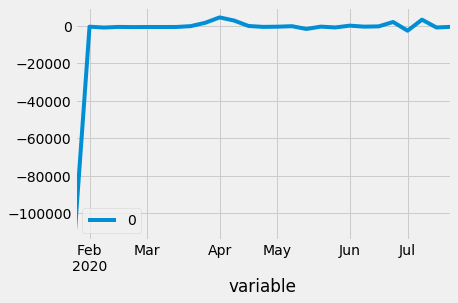

In [200]:
from matplotlib import pyplot
pyplot.style.use('fivethirtyeight')
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

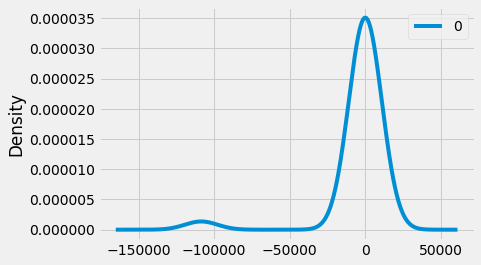

In [201]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(kind='kde')
pyplot.show()

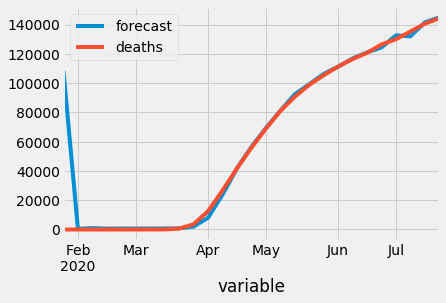

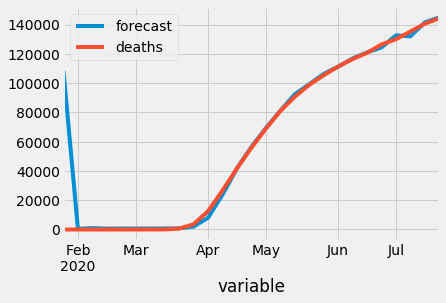

In [202]:
model_fit.plot_predict()

In [203]:
# Create Training and Test
train = weekly_death.deaths[:21]
test = weekly_death.deaths[21:]


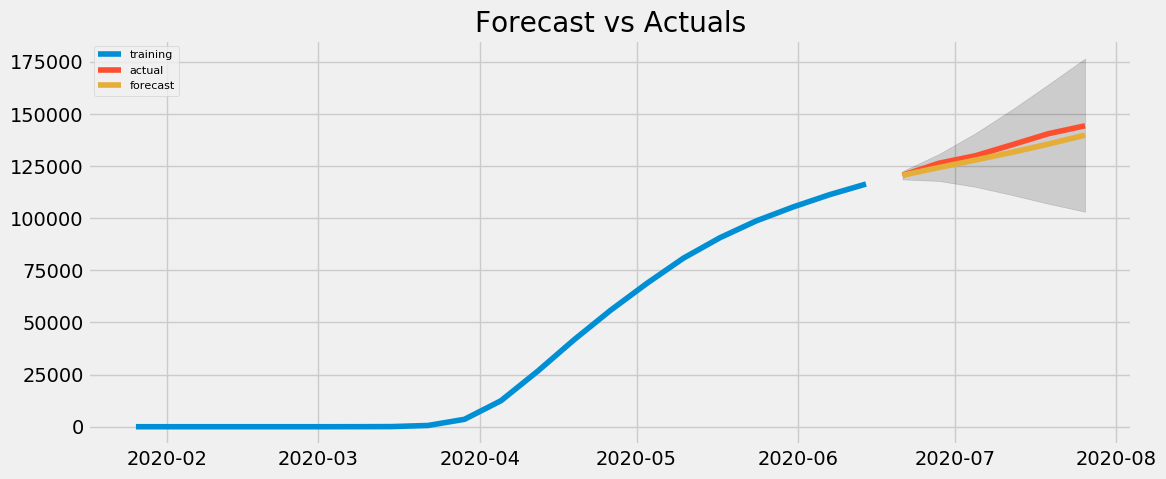

In [204]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(2, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(6, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [205]:
deaths_concat.to_csv('Death_time.csv')

In [206]:
confirmed_concat.to_csv('Confirmed_time.csv')

In [207]:
confirmed_concat.to_csv('Confirmed_time.csv')

In [208]:
death_total.reset_index(inplace=True)

In [209]:
# test_dates = '2020-07-10'
# training_dates_start = '2020-03-10'
# training_dates_end = '2020-07-08'
# testing_set_values = death_total_diff2[test_dates:]
# testing_set = death_total_diff2[test_dates:].drop('deaths',axis=1)
# training_set = death_total_diff2[training_dates_start:training_dates_end]
# actual_training = death_total[training_dates_start:training_dates_end]
# actual_testing = death_total[test_dates:]

death_total

test_dates = 169
training_dates_start = 48
training_dates_end = 169
testing_set_values = death_total[test_dates:].drop('variable',axis=1)
testing_set = death_total[test_dates:].drop(['deaths','variable'],axis=1)
training_set = death_total[training_dates_start:training_dates_end].drop('variable',axis=1)
actual_training = death_total[training_dates_start:training_dates_end].drop('variable',axis=1)
actual_testing = death_total[test_dates:].drop('variable',axis=1)





In [210]:
national_deaths.drop('pct_change',axis=1)['2020-03-10':].diff().diff().plot()

KeyError: "['pct_change'] not found in axis"

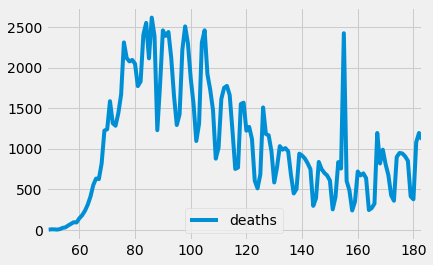

In [391]:
death_total.drop('variable',axis=1)[48:].diff().plot()

In [392]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(death_total.drop('variable',axis=1)[48:])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                  -2.600751
p-value                          0.092842
#Lags Used                      11.000000
Number of Observations Used    124.000000
dtype: float64


In [393]:
stepwise_fit = pm.auto_arima(training_set, start_p=1, start_q=1,start_d=3,max_d=3
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True) 

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=1627.976, BIC=1641.386, Time=1.021 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=1743.905, BIC=1749.269, Time=0.013 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=1651.222, BIC=1661.950, Time=0.433 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=1681.387, BIC=1692.115, Time=0.538 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=1742.495, BIC=1745.178, Time=0.020 seconds
Fit ARIMA(1,1,1)x(0,1,0,12) [intercept=True]; AIC=1670.812, BIC=1681.540, Time=0.048 seconds
Fit ARIMA(1,1,1)x(1,1,1,12) [intercept=True]; AIC=1629.854, BIC=1645.946, Time=1.013 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA(1,1,1)x(0,1,2,12) [intercept=True]; AIC=1629.845, BIC=1645.938, Time=2.660 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 2

In [394]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  121
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -804.301
Date:                              Wed, 29 Jul 2020   AIC                           1620.602
Time:                                      19:07:50   BIC                           1636.694
Sample:                                           0   HQIC                          1627.127
                                              - 121                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2296      4.080      0.301      0.763      -6.768       9.227
ar.L1          0.9781      0.036     27.394      0.000       0.908       1.048
ma.L1         -0.2264      0.107     -2.123      0.034      -0.435      -0.017
ma.L2         -0.3466      0.104     -3.317      0.001      -0.551      -0.142
ma.S.L12      -0.9172      0.389     -2.358      0.018      -1.680      -0.155
sigma2      1.488e+05   4.78e+04      3.112      0.002    5.51e+04    2.42e+05
===================================================================================
Ljung-Box (Q):                      217.70   Jarque-Bera (JB):                50.54
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.49   Skew:                             0.13
Prob(H) (two-sided):                  0.24   Kurtosis:                         6.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [395]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(training_set,
 order=(0,0,2),
 enforce_invertibility=False, enforce_stationarity=False)





In [396]:
results= model.fit()


In [397]:
predictions= results.predict(start =training_dates_start, end=169,exog=actual_training)


In [398]:
forecast_1= results.forecast(steps=169, exog=actual_training)


In [399]:
act= pd.DataFrame(scaler_output.iloc[train_size:, 0])


NameError: name 'scaler_output' is not defined

In [ ]:
forecast_testing = pd.DataFrame(forecast_1)

In [ ]:
forcast_testing = forecast_testing.head(15)

In [ ]:
337-183

In [ ]:
training_dates_start

In [ ]:
100* np.sqrt(metrics.mean_squared_error(forcast_testing, actual_testing))

In [ ]:
death_total['pct_change'] = death_total['deaths'].pct_change()
death_total.drop('deaths', axis=1, inplace=True)
death_total.rename(columns={'pct_change':'deaths'}, inplace=True)
death_total.rename(columns={'pct_change':'deaths'}, inplace=True)

from statsmodels.tsa.stattools import adfuller
test = adfuller(whole_set.deaths[2:])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

death_total_diff1= death_total['2020-03-10':].diff()
death_total_diff2=death_total_diff1
test_dates = '2020-07-09'
training_dates_start = '2020-03-10'
training_dates_end = '2020-07-08'
testing_set_values = death_total_diff2[test_dates:]
testing_set = death_total_diff2[test_dates:].drop('deaths',axis=1)
training_set = death_total_diff2[training_dates_start:training_dates_end]
actual_training = death_total[training_dates_start:training_dates_end]
actual_testing = death_total[test_dates:]
whole_set = death_total[training_dates_start:]


from statsmodels.graphics.tsaplots import plot_acf
#plot autocorrelation for each lag (alpha is confidence interval)
plot_acf(training_set[2:], alpha=.05)

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(actual_training, order=(3,0,5))
model_fit = model.fit(disp=0)
print(model_fit.summary())

pred_deaths = model_fit.predict()

pred_deaths=pd.DataFrame(pred_deaths)

pred_deaths.rename(columns={0:'death_pct'},inplace=True)

predict=model_fit.predict(start=pred_start_date, end=pred_end_date)

def converting_from_precentage(value2,sample_list):
    #value must be the value of one day prior to the sample set
    value=value2
    listing =[]
    for i in sample_list:
        value=(value*(i+1))
        listing.append(value)
    return listing

def rmse(listing,actual):
    return np.sqrt(metrics.mean_squared_error(listing, actual))


In [ ]:

converting_from_precentage(28,pred_deaths['death_pct'])

rmse(converting_from_precentage(28,pred_deaths['death_pct']),actual_training)


In [ ]:
predict=model_fit.predict(start=pred_start_date, end=pred_end_date)

converting_from_precentage(132300,predict)

rmse(converting_from_precentage(132300,predict),actual_testing)

In [ ]:

predict.plot()
testing_set_values.plot()